In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import numpy as np
import warnings
warnings.filterwarnings ('ignore')

In [2]:
df = pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
df = pd.read_csv ("telcom_data - Sheet1.csv")
df.head ()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#

# About Data

In [3]:
df.shape

(150001, 55)

In [4]:
unique_value = set (df)
print (unique_value)

{'Nb of sec with 125000B < Vol DL', 'Other UL (Bytes)', 'HTTP DL (Bytes)', 'Dur. (ms).1', 'Youtube UL (Bytes)', 'Dur. (ms)', 'Youtube DL (Bytes)', 'Google UL (Bytes)', 'MSISDN/Number', 'Bearer Id', 'Avg RTT UL (ms)', '10 Kbps < UL TP < 50 Kbps (%)', 'Nb of sec with 37500B < Vol UL', 'IMEI', 'Last Location Name', 'Handset Type', 'Handset Manufacturer', 'Nb of sec with Vol UL < 1250B', '50 Kbps < DL TP < 250 Kbps (%)', 'Social Media DL (Bytes)', 'Email DL (Bytes)', 'Total UL (Bytes)', 'Activity Duration UL (ms)', 'Nb of sec with 6250B < Vol UL < 37500B', 'IMSI', 'Avg Bearer TP UL (kbps)', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 1250B < Vol UL < 6250B', '50 Kbps < UL TP < 300 Kbps (%)', 'End', 'End ms', 'Google DL (Bytes)', 'Activity Duration DL (ms)', 'TCP UL Retrans. Vol (Bytes)', 'UL TP > 300 Kbps (%)', 'DL TP > 1 Mbps (%)', 'Start', 'Netflix DL (Bytes)', 'Social Media UL (Bytes)', 'Gaming UL (Bytes)', 'Total DL (Bytes)', 'DL TP < 50 Kbps (%)', 'Nb of sec with Vol DL 

In [5]:
df.describe ()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893170e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156

In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
categorical_data = [feature for feature in df.columns if df [feature].dtypes == 'o']
categorical_data

[]

### Missing Values

In [8]:
df.isnull ().sum ()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

<Axes: >

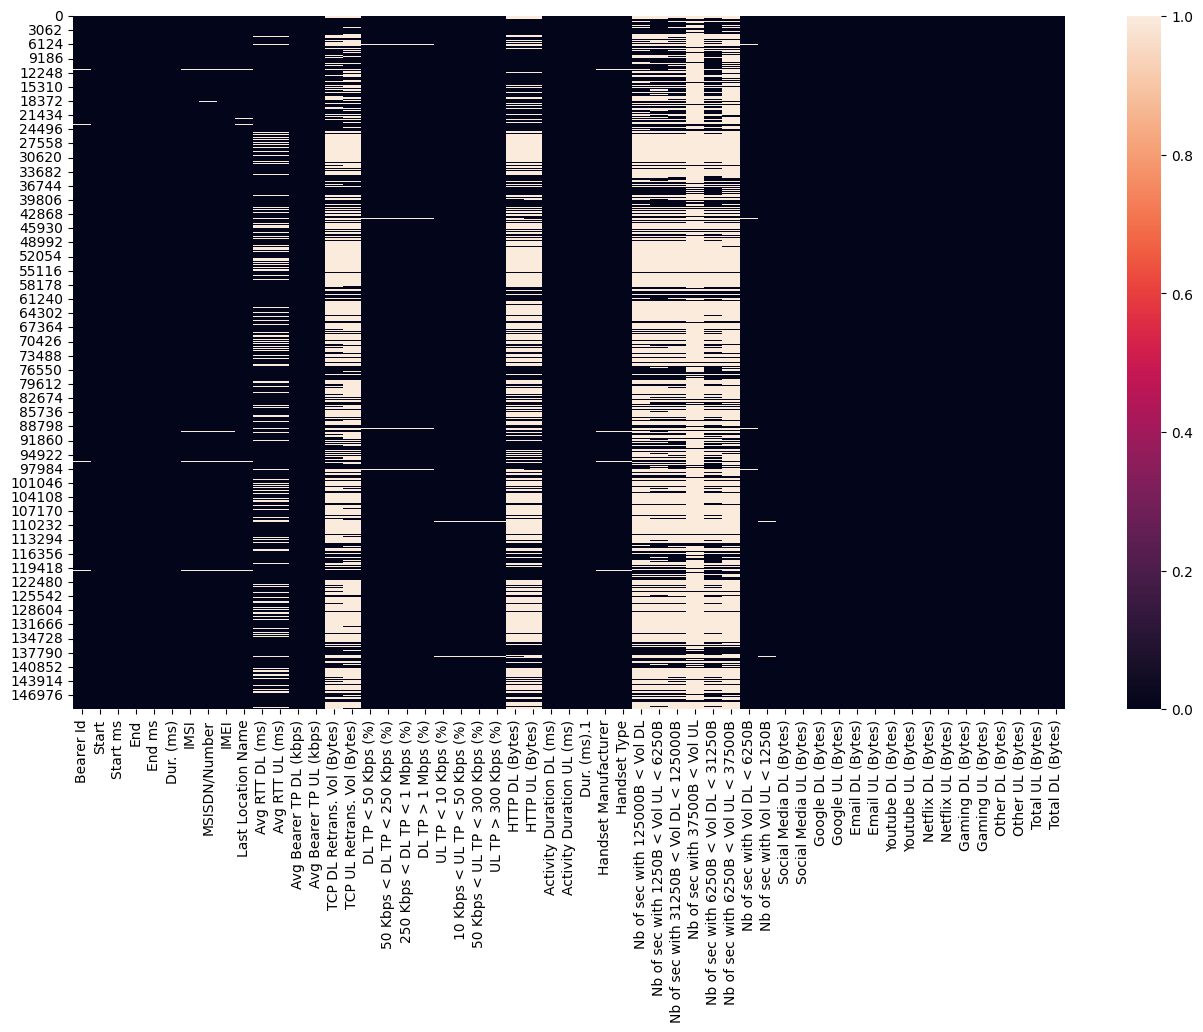

In [9]:
plt.figure (figsize=(16,9))
sns.heatmap (df.isnull())

In [10]:
null_percentage  = df.isnull ().sum ()/df.shape[0]*100
missing_val = null_percentage [null_percentage > 0]
print (missing_val)

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [11]:
df1 = df.copy ()

### Clean the data

In [12]:
# Drop rows with critical missing values
critical_columns = ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI','Last Location Name']
df1 = df1.dropna(subset=critical_columns)

# Fill missing values in performance metrics with mean
performance_columns = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
    '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
    'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
    'UL TP > 300 Kbps (%)'
]
df1[performance_columns] = df1[performance_columns].fillna(df1[performance_columns].mean())

# Fill missing values in usage metrics with mean
usage_columns = ['HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Total UL (Bytes)', 'Total DL (Bytes)']
df1[usage_columns] = df1[usage_columns].fillna(df1[usage_columns].mean())

# Fill missing values in manufacturer and handset information with mode
handset_columns = ['Handset Manufacturer', 'Handset Type']
df1[handset_columns] = df1[handset_columns].fillna(df1[handset_columns].mode().iloc[0])


# fill missing value of volume
volume_columns = [
    'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 
    'Nb of sec with Vol UL < 1250B'
]

# Forward fill
df1[volume_columns] = df1[volume_columns].fillna(method='ffill')

# Backward fill
df1[volume_columns] = df1[volume_columns].fillna(method='bfill')

# Custom Imputation Example (e.g., setting to a specific threshold)
df1['Nb of sec with 125000B < Vol DL'] = df1['Nb of sec with 125000B < Vol DL'].fillna(0)

# Check the shape of the cleaned dataset
df1.shape


(148346, 55)

## Co-relation

In [13]:
non_numeric = df1.select_dtypes(include=['object']).columns

# Exclude non-numeric columns from correlation calculation
numeric_df = df1.drop(columns=non_numeric)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Now you can use the correlation matrix for analysis or visualization
correlation_matrix

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
Bearer Id,1.000000,0.002582,-0.001073,0.006069,0.002819,-3.308651e-03,0.164002,-2.034824e-02,3.201351e-02,0.065147,0.048329,1.220961e-02,5.201006e-03,-0.070441,0.045368,0.063032,0.063959,-0.041451,0.032655,0.016981,0.010609,1.993061e-02,2.040964e-02,0.081470,0.069093,0.006069,0.034603,0.019742,0.042319,0.007730,0.041502,0.009306,0.082901,0.076322,-0.000898,-0.000986,-0.000886,0.002372,0.002369,-0.000384,-0.002460,-0.000613,-0.000755,-0.003685,0.000670,-0.003040,0.000638,-0.002158,-0.004384,0.000575
Start ms,0.002582,1.000000,0.122684,0.001252,0.002448,-1.022910e-03,-0.001180,2.326121e-03,-1.726615e-03,-0.000355,-0.001179,1.110273e-05,-2.151443e-03,0.000229,-0.002620,0.000354,0.002754,0.000060,0.000169,0.000391,-0.000116,2.316794e-03,1.212454e-03,0.000092,-0.000277,0.001252,0.003378,-0.000468,-0.001051,0.001312,-0.000991,0.001135,0.000205,0.002310,0.001056,0.000283,0.001939,0.000626,0.001088,-0.001331,-0.001455,0.001528,-0.002240,-0.002759,-0.004524,-0.002455,-0.003781,0.003591,-0.000184,-0.004587
End ms,-0.001073,0.122684,1.000000,-0.001315,-0.001078,-1.893083e-03,-0.000054,-3.586216e-03,-2.330324e-03,0.000688,0.000816,2.994038e-03,-2.029688e-03,-0.003536,0.004051,0.002294,0.002502,-0.001949,0.002058,0.002619,-0.001901,2.314125e-03,-1.004366e-03,0.000374,-0.000615,-0.001315,-0.001310,-0.002879,0.000077,-0.002931,0.002217,0.000583,-0.004126,-0.002141,0.002845,-0.004032,-0.001433,0.004305,-0.002390,-0.000116,-0.003231,-0.003777,0.003925,-0.001187,-0.004718,0.000885,0.002880,0.002749,-0.000812,-0.004713
Dur. (ms),0.006069,0.001252,-0.001315,1.000000,-0.032010,2.466780e-02,-0.059469,-4.051383e-02,-2.377709e-03,-0.166655,-0.115115,8.152717e-03,2.559552e-03,0.197068,-0.193093,-0.146093,-0.103912,0.107439,-0.083221,-0.030703,-0.018062,1.200838e-02,1.860708e-02,-0.074418,-0.067186,1.000000,-0.008206,0.003263,-0.013031,-0.011272,-0.007549,-0.014840,-0.060993,-0.066486,-0.003041,-0.001161,0.000996,-0.003295,0.003836,-0.001486,0.003901,0.002105,-0.001978,-0.005492,0.000854,0.001519,-0.000287,0.001506,-0.001016,0.000923
IMSI,0.002819,0.002448,-0.001078,-0.032010,1.000000,-6.625675e-01,-0.005229,-1.042759e-04,1.408418e-04,0.000652,0.000637,-1.555496e-04,-2.417280e-04,-0.000540,0.000525,0.000472,0.000214,0.000972,-0.000766,-0.000377,-0.000324,-2.541253e-04,2.781184e-04,0.000040,0.001419,-0.032010,0.001511,0.000823,0.001781,0.000078,0.001906,0.000200,0.006300,0.000408,0.002632,-0.002909,-0.001956,-0.001503,0.000021,-0.003931,-0.001598,-0.000275,-0.001993,-0.000835,0.005298,-0.004730,-0.000075,0.000445,-0.002700,0.005180
MSISDN/Number,-0.003309,-0.001023,-0.001893,0.024668,-0.662568,1.000000e+00,0.005714,-2.653626e-08,1.426242e-07,-0.001860,-0.001280,2.360002e-07,3.627836e-08,0.001841,-0.001656,-0.001387,-0.001123,0.000293,-0.000223,-0.000084,-0.000056,2.427068e-07,2.559589e-07,-0.001078,-0.001017,0.024668,-0.001162,-0.000738,-0.001352,-0.000321,-0.001472,-0.000360,-0.001314,-0.000939,-0.00

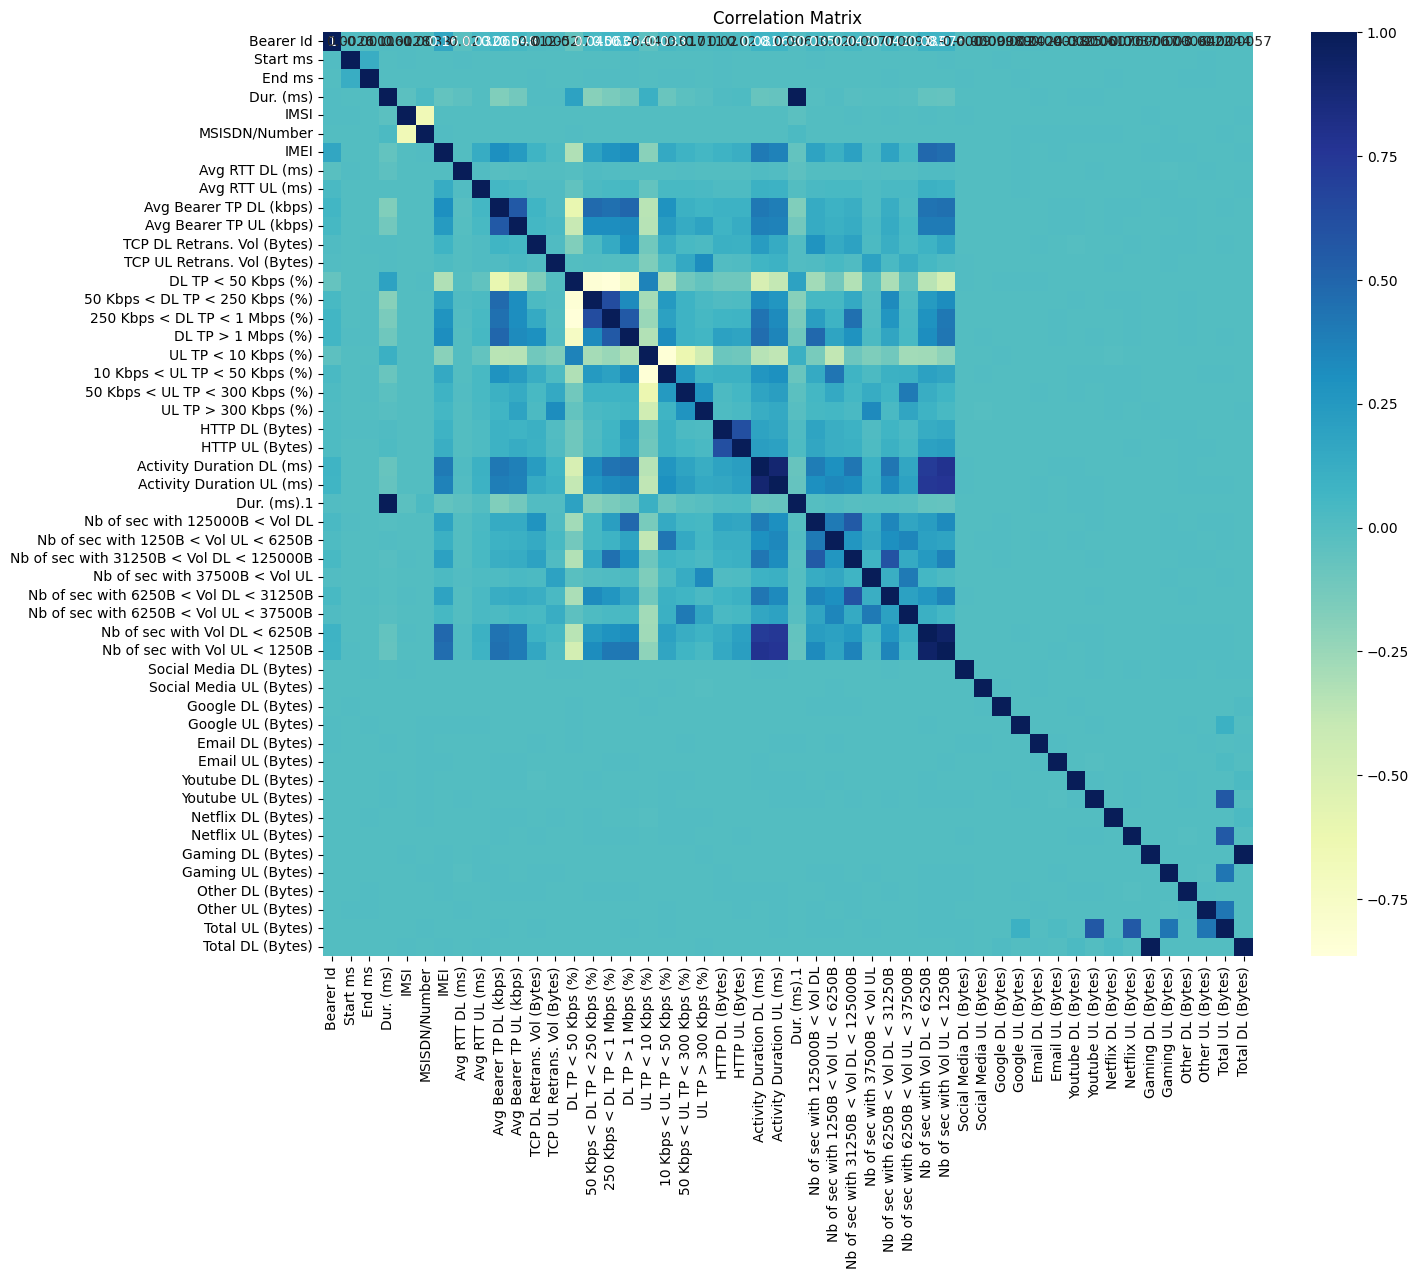

In [14]:
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix , annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

## Outliers

In [15]:
numerical_data = [feature for feature in df1.columns if df1 [feature].dtypes != 'o']
discrete_feature=[feature for feature in numerical_data if len(df1[feature].unique())<25 ]
continuous_feature=[feature for feature in numerical_data if feature not in discrete_feature]


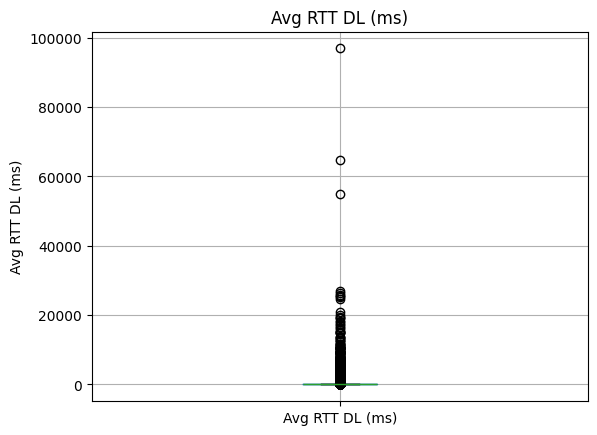

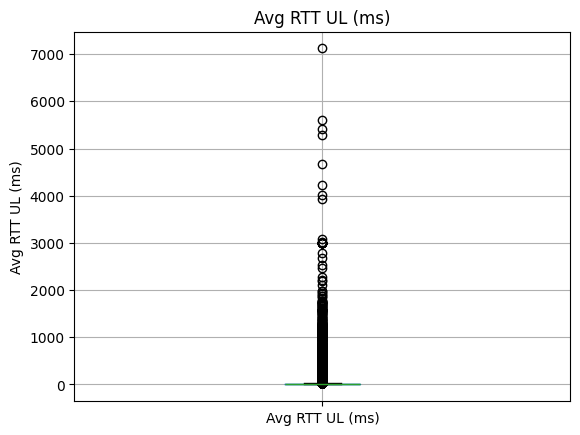

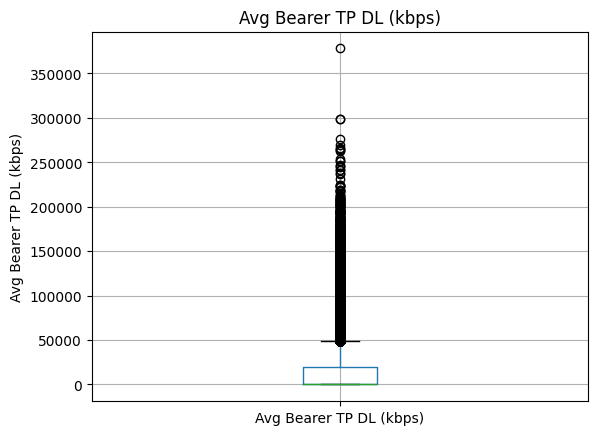

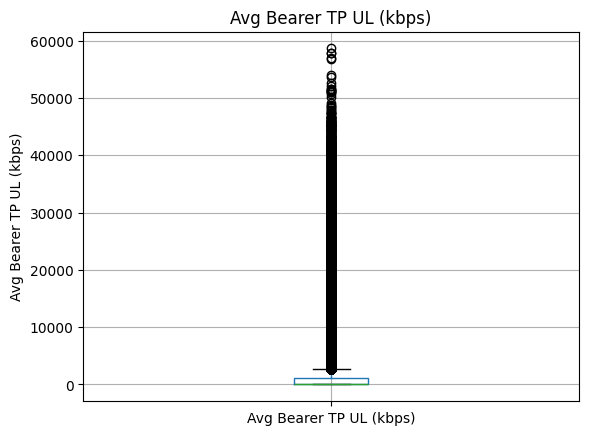

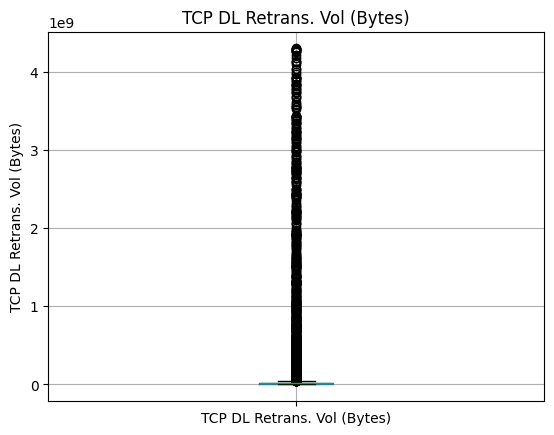

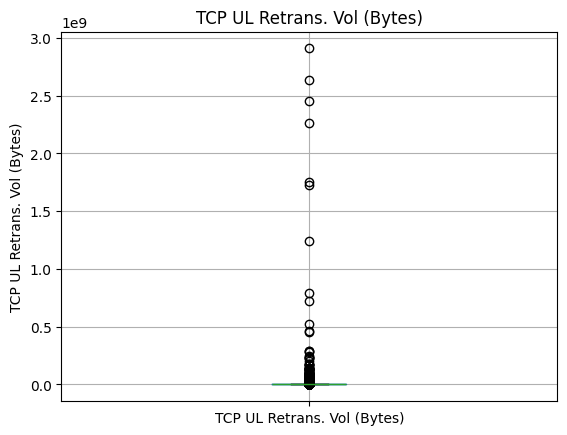

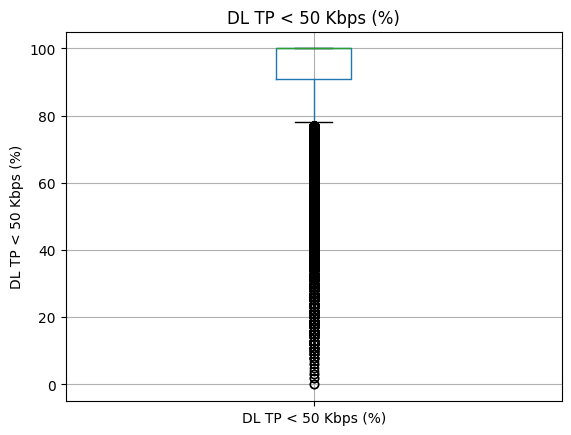

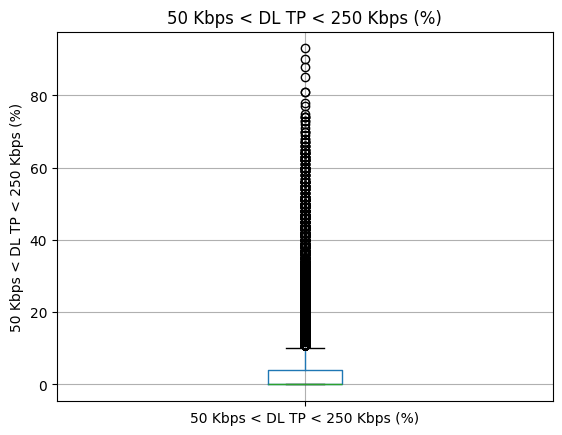

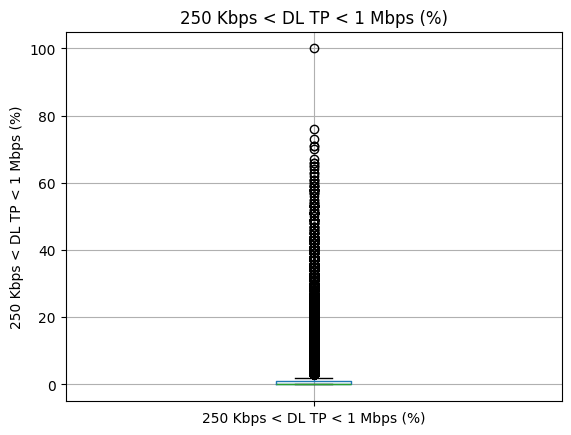

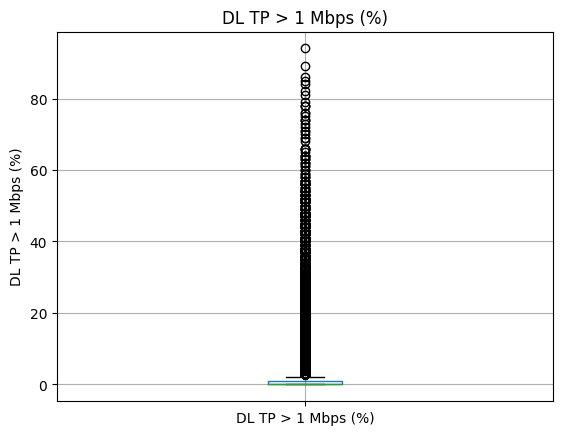

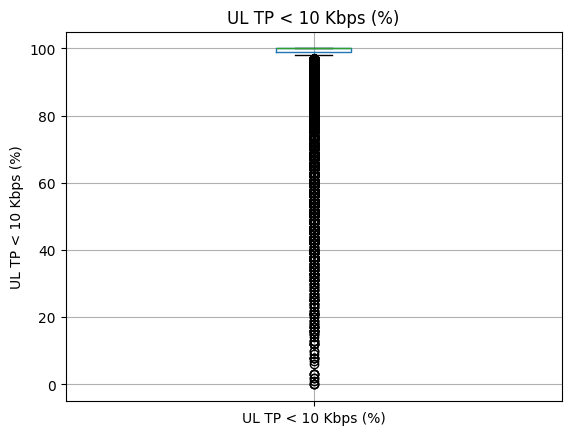

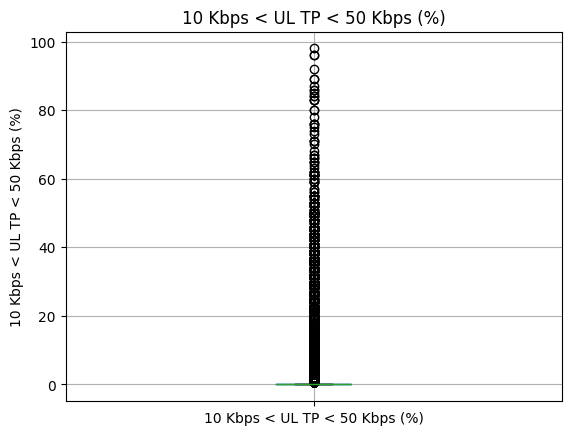

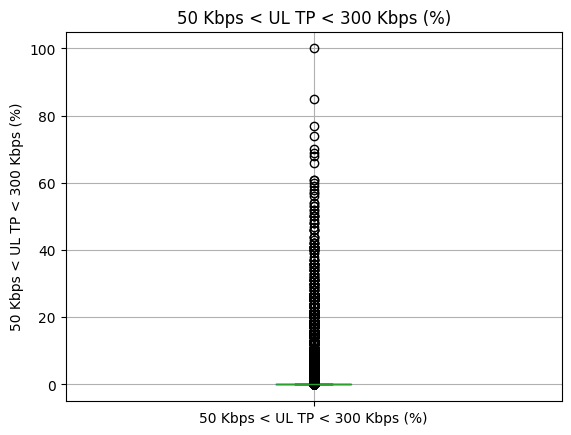

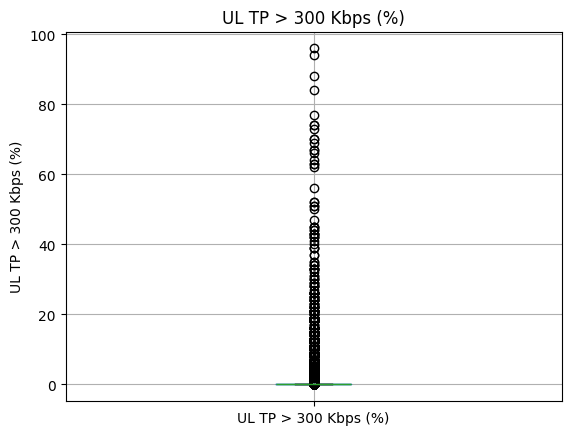

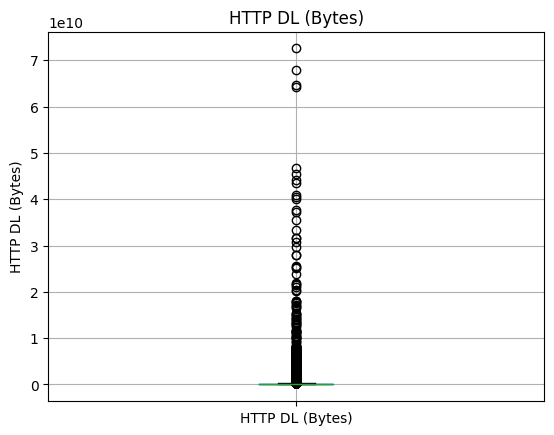

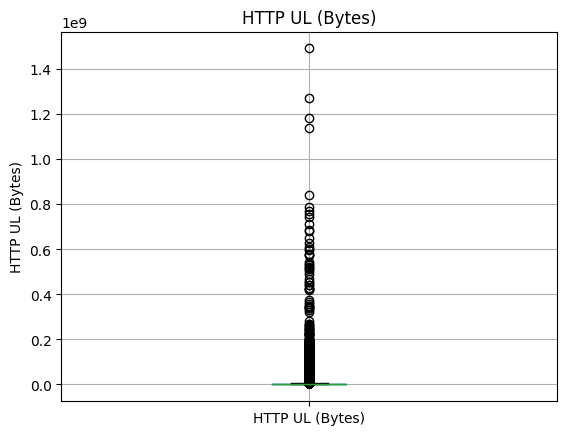

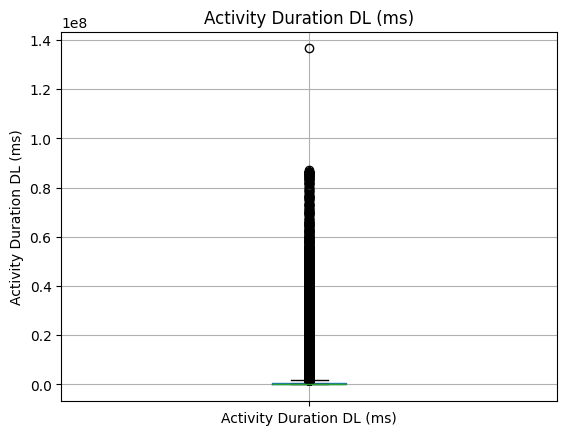

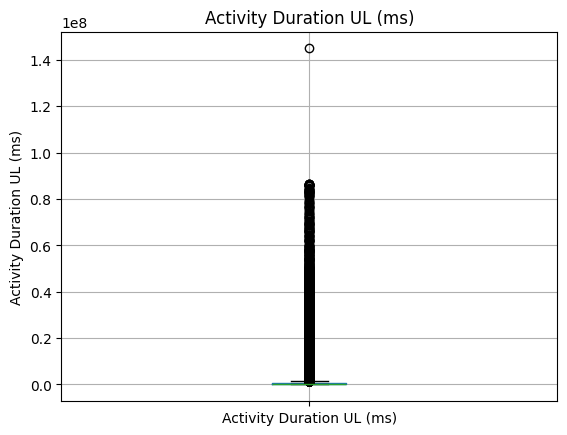

In [16]:
import matplotlib.pyplot as plt

# Define the correct list of continuous features based on the DataFrame columns
continuous_feature = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)'
]

# Iterate through the features and plot if the column exists
for feature in continuous_feature:
    if feature in df1.columns:
        df1.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    else:
        print(f"Column '{feature}' does not exist in DataFrame.")


## Identify the Top 5 Handsets Per Top 3 Manufacturer
## Identify the Top 10 Handsets
## Identify the Top 3 Handset Manufacturers

In [17]:
#top_5_handsets_per_manufacturer = {}
#for manufacturer in top_3_manufacturers.index:
 #   top_5_handsets = df1[df1['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
  #  top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Display the top 5 handsets for each of the top 3 manufacturers
#for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
 #   print(f"Top 5 handsets for {manufacturer}:\n{handsets}\n")


Top 10 handsets used by customers:
 Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


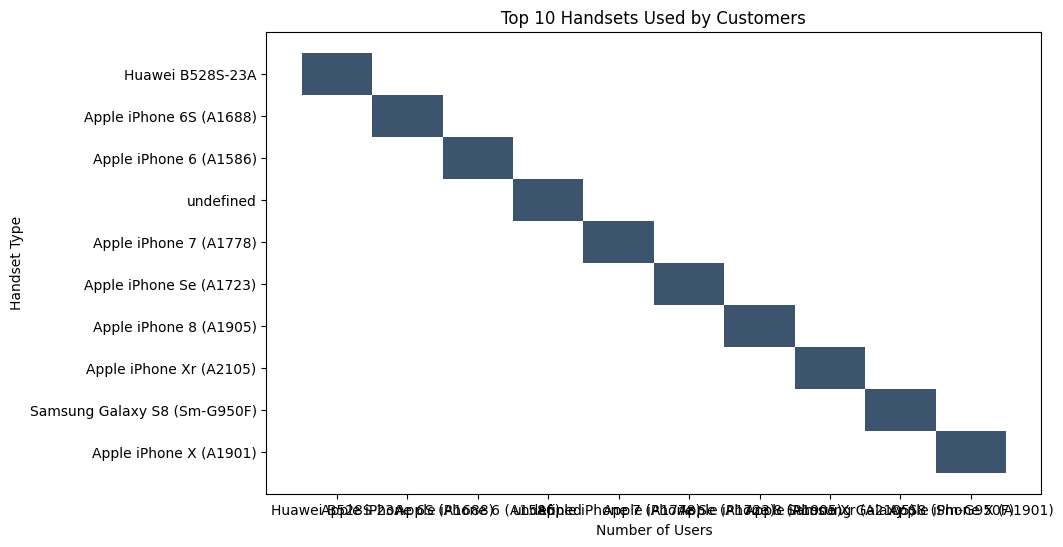

Top 3 handset manufacturers:
 Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


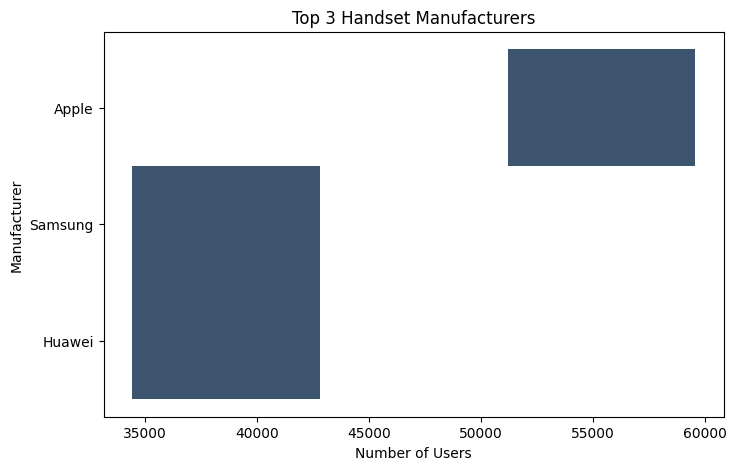

Top 5 handsets for :     Handset Manufacturer                    Handset Type  MSISDN/Number
0                 Apple         Apple iPhone 6S (A1688)           9413
1                 Apple          Apple iPhone 6 (A1586)           9012
2                 Apple          Apple iPhone 7 (A1778)           6304
3                 Apple         Apple iPhone Se (A1723)           5176
4                 Apple          Apple iPhone 8 (A1905)           4985
5                Huawei                Huawei B528S-23A          19727
6                Huawei                    Huawei E5180           2074
7                Huawei  Huawei P20 Lite Huawei Nova 3E           2018
8                Huawei                      Huawei P20           1479
9                Huawei                  Huawei Y6 2018            997
10              Samsung    Samsung Galaxy S8 (Sm-G950F)           4480
11              Samsung      Samsung Galaxy A5 Sm-A520F           3708
12              Samsung     Samsung Galaxy J5 (Sm-J530)

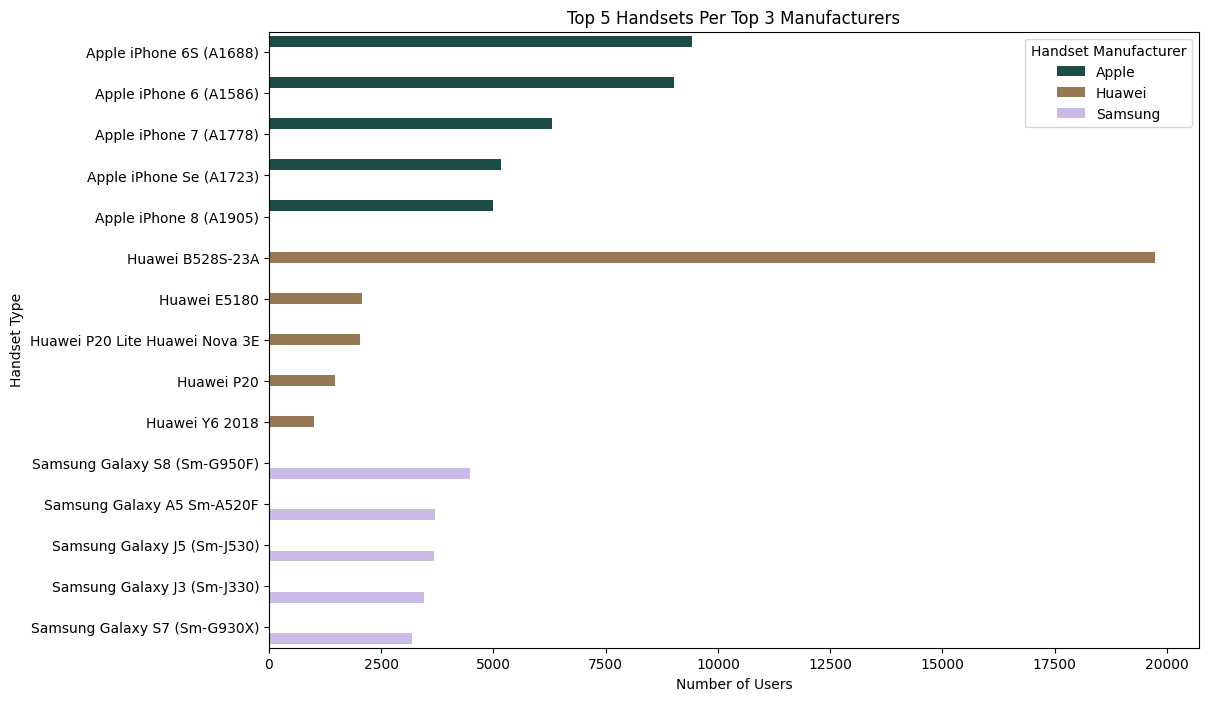

In [21]:
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Aggregating data to find the top handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Finding the top 5 handsets per top 3 handset manufacturers
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_manufacturers.index)] \
    .groupby(['Handset Manufacturer', 'Handset Type'])['MSISDN/Number'] \
    .count() \
    .groupby(level=0, group_keys=False) \
    .nlargest(5) \
    .reset_index()



# Plotting the top 10 handsets
print("Top 10 handsets used by customers:\n", top_10_handsets)
plt.figure(figsize=(10, 6))
sns.histplot(y=top_10_handsets.index, x=top_10_handsets.index.values, palette="viridis")
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()

# Plotting the top 3 handset manufacturersprint("Top 3 handset manufacturers:\n", top_3_manufacturers)
print("Top 3 handset manufacturers:\n", top_3_manufacturers)
plt.figure(figsize=(8, 5))
sns.histplot(y=top_3_manufacturers.index, x=top_3_manufacturers.values, palette="magma")
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Users')
plt.ylabel('Manufacturer')
plt.show()


print("Top 5 handsets for : ", top_5_handsets_per_manufacturer)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_handsets_per_manufacturer, y='Handset Type', x='MSISDN/Number', hue='Handset Manufacturer', palette="cubehelix")
plt.title('Top 5 Handsets Per Top 3 Manufacturers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()

# User Behaviour Data

In [22]:
# Group by user ID and aggregate the relevant columns
user_behavior = df1.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total session duration
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Total DL (Bytes)': 'sum',  # Total download data
    'Social Media UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

# Calculate the total data volume for each application
user_behavior['Total Social Media Data (Bytes)'] = user_behavior['Social Media UL (Bytes)'] + user_behavior['Social Media DL (Bytes)']
user_behavior['Total Google Data (Bytes)'] = user_behavior['Google UL (Bytes)'] + user_behavior['Google DL (Bytes)']
user_behavior['Total Email Data (Bytes)'] = user_behavior['Email UL (Bytes)'] + user_behavior['Email DL (Bytes)']
user_behavior['Total YouTube Data (Bytes)'] = user_behavior['Youtube UL (Bytes)'] + user_behavior['Youtube DL (Bytes)']
user_behavior['Total Netflix Data (Bytes)'] = user_behavior['Netflix UL (Bytes)'] + user_behavior['Netflix DL (Bytes)']
user_behavior['Total Gaming Data (Bytes)'] = user_behavior['Gaming UL (Bytes)'] + user_behavior['Gaming DL (Bytes)']
user_behavior['Total Other Data (Bytes)'] = user_behavior['Other UL (Bytes)'] + user_behavior['Other DL (Bytes)']


### Analyz behaviour

In [23]:
# Summary statistics
user_behavior.describe()

# Identify the most popular application by total data volume
app_usage = user_behavior[['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 
                           'Total Email Data (Bytes)', 'Total YouTube Data (Bytes)', 
                           'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 
                           'Total Other Data (Bytes)']].sum()
app_usage = app_usage.sort_values(ascending=False)
print("Application usage summary:\n", app_usage)


Application usage summary:
 Total Gaming Data (Bytes)          6.384655e+13
Total Other Data (Bytes)           6.370400e+13
Total YouTube Data (Bytes)         3.359002e+12
Total Netflix Data (Bytes)         3.356973e+12
Total Google Data (Bytes)          1.158267e+12
Total Email Data (Bytes)           3.351293e+11
Total Social Media Data (Bytes)    2.711855e+11
dtype: float64


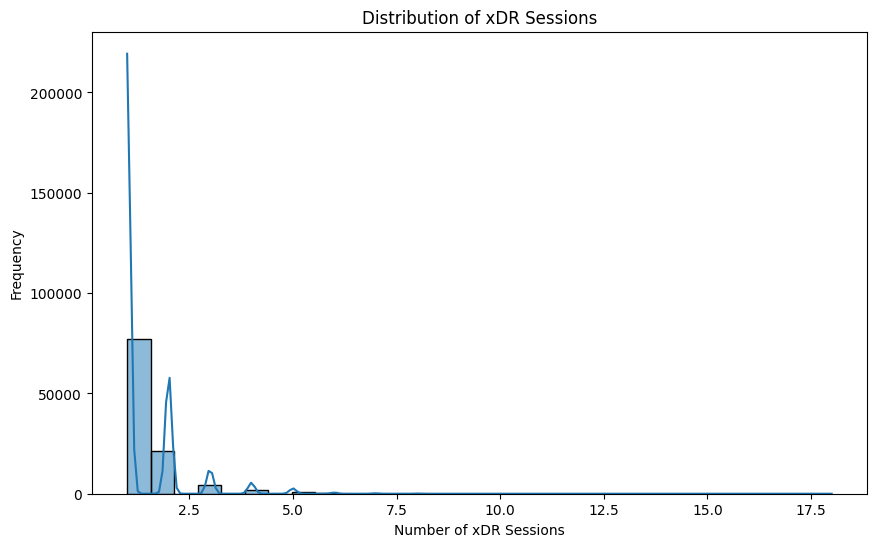

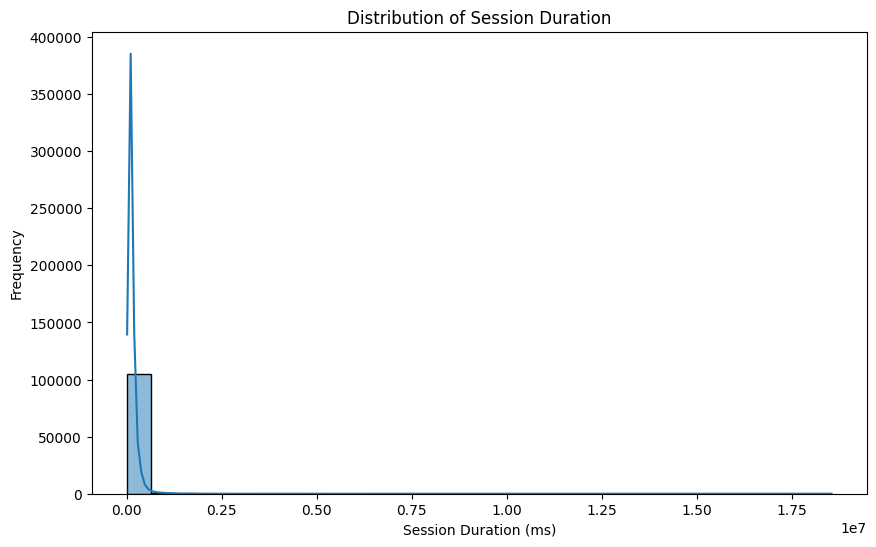

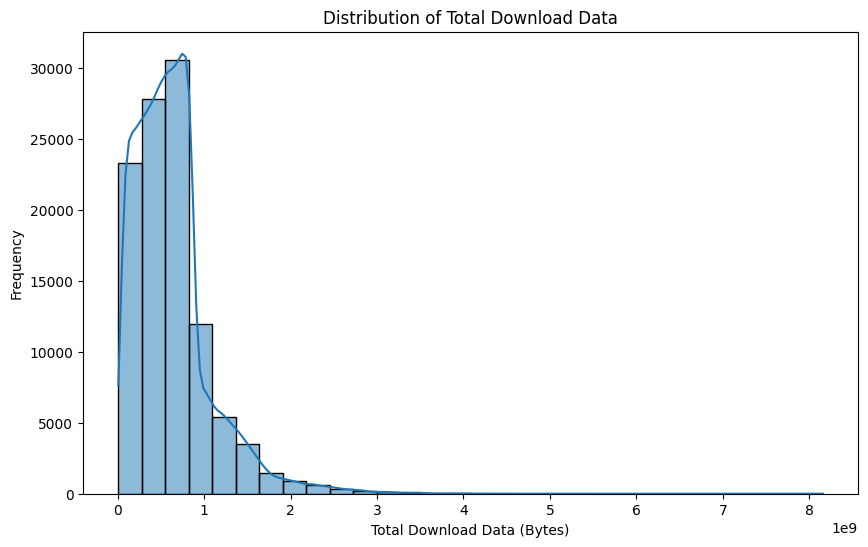

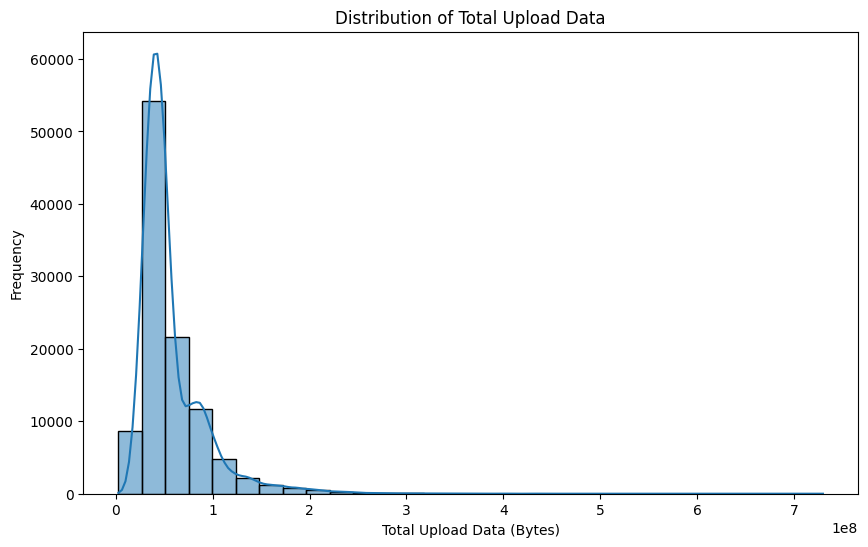

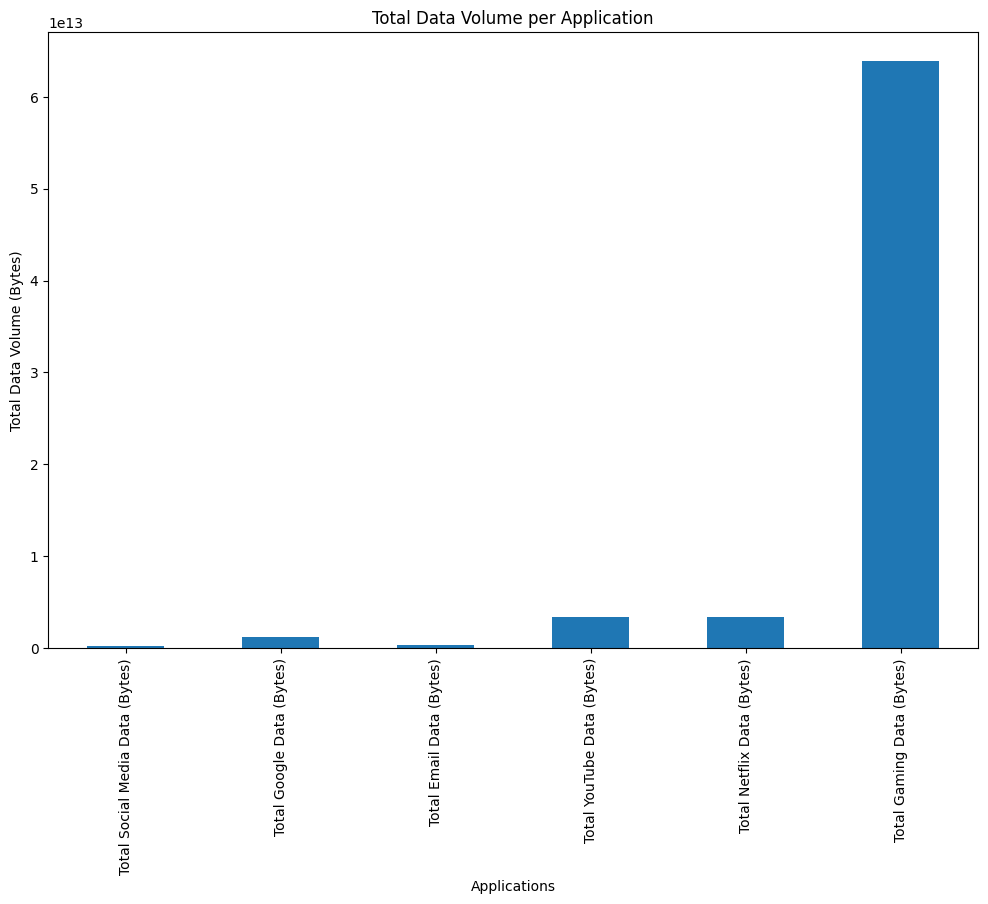

In [24]:

# Plotting the distribution of xDR sessions
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Bearer Id'], kde=True, bins=30)
plt.title('Distribution of xDR Sessions')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Session Duration
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Dur. (ms)'], kde=True, bins=30)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Download Data
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Total DL (Bytes)'], kde=True, bins=30)
plt.title('Distribution of Total Download Data')
plt.xlabel('Total Download Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

# Plotting the distribution of Upload Data
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Total UL (Bytes)'], kde=True, bins=30)
plt.title('Distribution of Total Upload Data')
plt.xlabel('Total Upload Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

# Plotting the bivariate analysis of Data Consumption per Application
plt.figure(figsize=(12, 8))
app_columns = [
    'Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 
    'Total Email Data (Bytes)', 'Total YouTube Data (Bytes)', 
    'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)'
]

user_behavior[app_columns].sum().plot(kind='bar')
plt.title('Total Data Volume per Application')
plt.xlabel('Applications')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()


## Auto Viz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

In [ ]:
df2 = df1[
    [
        'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
        'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
        'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
        'Handset Manufacturer', 'Handset Type',  'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 
        'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)','Total DL (Bytes)', 'Social Media UL (Bytes)','Social Media DL (Bytes)','Google UL (Bytes)','Google DL (Bytes)',
        'Email UL (Bytes)','Email DL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)','Netflix UL (Bytes)','Netflix DL (Bytes)','Gaming UL (Bytes)','Gaming DL (Bytes)','Other UL (Bytes)',
    'Other DL (Bytes)'
    ]
]



In [ ]:
plt.rcParams['figure.figsize'] = [10, 6] 
sep = ","
dft = AV.AutoViz(
    df2,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=1500,
    max_cols_analyzed=37,
    # explorative=True,
    #minimal=True ,
)
sns.set(rc={'figure.figsize':(10, 6)})
plt.show ()

## Customer Sectionlisation
#### Let's implement K-means clustering to segment the customers

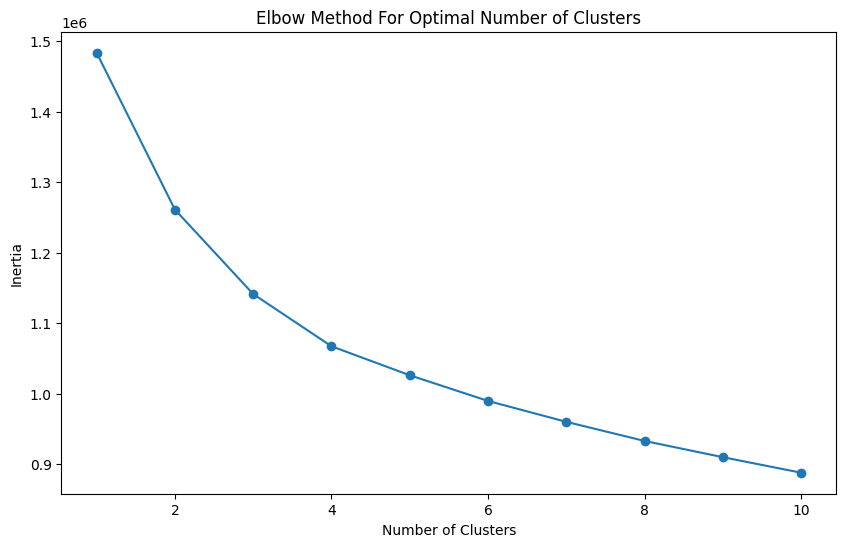

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the columns for clustering
usage_columns = [
    'Total UL (Bytes)', 'Total DL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[usage_columns])

# Finding the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
m=[
        'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
        'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)','DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
        'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
          'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 
        'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Total UL (Bytes)','Total DL (Bytes)', 'Social Media UL (Bytes)','Social Media DL (Bytes)','Google UL (Bytes)','Google DL (Bytes)',
        'Email UL (Bytes)','Email DL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)','Netflix UL (Bytes)','Netflix DL (Bytes)','Gaming UL (Bytes)','Gaming DL (Bytes)','Other UL (Bytes)',
    'Other DL (Bytes)'
    ]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[m])

# Finding the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


### Analyse the segment

In [27]:
optimal_clusters = 4  # Replace with the optimal number found from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df1['Cluster'] = kmeans.fit_predict(scaled_data)
cluster_summary = df1.groupby('Cluster')[usage_columns].mean()
print(cluster_summary)


         Total UL (Bytes)  Total DL (Bytes)  Youtube DL (Bytes)  \
Cluster                                                           
0            3.207466e+07      2.422058e+08        1.163226e+07   
1            5.010229e+07      6.654490e+08        1.172900e+07   
2            5.026427e+07      2.413710e+08        1.156078e+07   
3            3.185839e+07      6.633645e+08        1.161384e+07   

         Youtube UL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  \
Cluster                                                               
0              7.670026e+06        1.176354e+07        8.258179e+06   
1              1.372355e+07        1.177992e+07        1.406525e+07   
2              1.440201e+07        1.143344e+07        1.377472e+07   
3              8.181706e+06        1.153079e+07        7.848941e+06   

         Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
Cluster                                                           
0             2.094860e+08       6.7

### Churn Analysis
Define Churn: Identify customers with no activity in the last month.

In [ ]:
print(df1['End'].max())

In [ ]:
print(df1['End'].min())

In [28]:
df1['End'] = pd.to_datetime(df1['End'])
last_month = df1['End'].max() - pd.DateOffset(days=1)
print (last_month)

2019-04-29 23:59:00


In [29]:
import datetime

df1['End'] = pd.to_datetime(df1['End'])
last_day = df1['End'].max() - pd.DateOffset(days=5)
churned_customers = df1[df1['End'] < last_day]['MSISDN/Number'].unique()
df1['Churn'] = df1['MSISDN/Number'].isin(churned_customers).astype(int)
df1.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Cluster,Churn
0,1.311450e+19,4/4/19 12:01,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,42.000000,5.000000,23.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,485.0,3.0,1.0,24.0,2.0,4.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0,0,1
1,1.311450e+19,4/9/19 13:04,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.000000,5.000000,16.0,26.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),485.0,3.0,1.0,24.0,2.0,4.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0,1,1
2,1.311450e+19,4/9/19 17:42,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,105.958376,17.633438,6.0,9.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),485.0,3.0,1.0,24.0,2.0,4.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0,0,1
3,1.311450e+19,4/10/19 0:31,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,105.958376,17.633438,44.0,44.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,3330.0,37882.0,1.321510e+09,undefined,undefined,485.0,3.0,1.0,24.0,2.0,4.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0,1,1
4,1.311450e+19,4/12/19 20:10,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,105.958376,17.633438,6.0,9.0,2.103058e+07,771882.022325,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,1.162868e+08,3.291068e+06,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,485.0,3.0,1.0,24.0,2.0,4.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0,3,1


## Machine Learning Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


usage_columns = [
    'Total UL (Bytes)', 'Total DL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Scaling the data
scaler = StandardScaler()
X= scaler.fit_transform(df1[usage_columns])

# Prepare features and target variable
#x = df1 [usage_columns]
y = df1['Churn']




# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     35571
           1       0.00      0.00      0.00      8933

    accuracy                           0.80     44504
   macro avg       0.40      0.50      0.44     44504
weighted avg       0.64      0.80      0.71     44504



## Handle Class Imbalance with SMOTE

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Balanced Accuracy: 0.500704113353231
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     23688
           1       0.20      0.17      0.18      5982

    accuracy                           0.70     29670
   macro avg       0.50      0.50      0.50     29670
weighted avg       0.68      0.70      0.69     29670



## Data Visualization

In [ ]:
import seaborn as sns

sns.pairplot(df1, vars=usage_columns, hue='Cluster')
plt.show()


## CLV (Customer Lifetime Value Calculation) Calculation

In [34]:
df1['Revenue'] = df1['Total DL (Bytes)'] * 0.01  # Example: revenue from data usage
df1['CLV'] = df1.groupby('MSISDN/Number')['Revenue'].transform('sum')


### segment customer

In [33]:
clv_summary = df1.groupby('Cluster')['CLV'].mean()
print(clv_summary)


Cluster
0    6.358239e+06
1    1.056810e+07
2    6.304830e+06
3    1.050695e+07
Name: CLV, dtype: float64


### Network Performance Analysis

In [35]:
performance_summary = df1.groupby('Cluster')[performance_columns].mean()
print(performance_summary)


         Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
Cluster                                                              
0             108.356635        17.529712             13478.350839   
1             103.286320        17.846357             13435.548783   
2             107.053628        17.475329             13162.709192   
3             105.207375        17.677172             13084.602288   

         Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
Cluster                                                         
0                    1792.080529                 2.139263e+07   
1                    1774.574402                 2.120030e+07   
2                    1762.415672                 2.114038e+07   
3                    1756.225133                 2.039011e+07   

         TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  \
Cluster                                                     
0                      903150.663064            92.883104   
1    

### Revenue Analyzsis

In [37]:
revenue_summary = df1.groupby('Cluster')['Revenue'].mean()
print(revenue_summary)


Cluster
0    2.422058e+06
1    6.654490e+06
2    2.413710e+06
3    6.633645e+06
Name: Revenue, dtype: float64
